# A Simple Malthusian Model 

This note illustrates how to code a simple Malthusian Model in Python. The purpose of this note is to walk through Python and its modelling applications. The model is based from *Macroeconomics, Fifth Edition* by Williamson (2014). 

[Quant Econ](https://quantecon.org/) and [Macro with Python](https://www.ncachanosky.com/macro_python/) are useful resources that informed me in writing this notebook.

## The Production Function
We start off by defining an aggregate production function which specifies how current output, $Y$, is produced using inputs of land, $L$, and capital, $K$, this can be outlined as:

$$ Y = zF(L,N)$$

where $z$ is total factor productivity. $F$ is a function that has (Constant-Returns-to-Scale) CRS properties. In this economy, $Y$ is defined as a Cobb-Doublas function:

$$ Y = zN^{\theta}L^{1-\theta}$$

where $0<\theta<1$. In this model, investment and savings are non-existent. There is no government spending as well. There is also a limited supply of Land,$L$. For interpretation, think of Y as a perishable good that cannot be stored for prolonged periods of time. 

In the python code, we start off by importing the libraries `numpy`, `matplotlib`, and `sympy`. `sympy` is useful for calculating the derivatives and presenting them in LaTeX format. The code below calculates the first order partial derivatives of $Y$ with respect to $L$ and $N$, and then prints them in Python and LaTeX formats. 

In [3]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
from sympy import Symbol

"Define the variables as mathematical symbols"
z,L,N,theta,gamma = Symbol('z'), Symbol('L') , Symbol('N'), Symbol('theta'), Symbol('gamma')
Y = z*(N)**(theta)*(L)**(1-theta) # Cobb-Douglas production function
"Calculate partial derivatives L, N"
Yprime_l = Y.diff(L)
Yprime_n = Y.diff(N)
print(Yprime_l, Yprime_n) # print partial derivatives

L**(1 - theta)*N**theta*z*(1 - theta)/L L**(1 - theta)*N**theta*theta*z/N


## Population Growth and Consumption Per Worker

The variable $N$ is defined as the population and labour input of the economy. Each person is willing to work for any wage and can only supply a single unit of labour. Furthermore, $N$ grows next period. This future $N$ is known as $N'$, which is defined as:

$$N' = N + Births + Deaths$$ 

or

$$N' = N + N(birth rate - death rate)$$

where the $birth rate$ is the ratio of births to population and the $death rate$ is the ratio of deaths to population. 

Also assume that the $birth rate$ is an increasing function of consumption per capita $(C/N)$ while the $death rate$ is as a decreasing function of $(C/N)$. The equation below is derived from the two aforementioned relationships:

$$\frac{N'}{N} = g(C/N)$$

where g is an increasing function. Note that $\frac{N'}{N}$ is equivalent to 1 plus the population growth rate. In this exercise, $\frac{N'}{N}$ is defined as:

$$ (Y/N)^{\gamma}, 0<\gamma<1$$

Under equilibrium, all goods are consumed. Therefore, in this economy, $Y=C$, This is the income-expenditure identity in the economy. As a result of this identity $\frac{N'}{N}$ can be described as:

$$\frac{N'}{N} = g(zF(L,N)/N)$$

$N'$ can be derived with the help of the constant-returns-to-scale propert of the production function:

$$xzF(L,N) = zF(xL,xN)$$

for any $x>0$, so if $x=1/N$ in the above equation, then:

$$zF(L,N)/N = zF(L/N,1)$$

Then multiply each side by $N$:

$$N' = g[zF(L/N, 1)]N$$

The equilibrium is defined as when: 

$$Y = C = zF(L,N)$$

and also:

$$\frac{N'}{N}= zF(L/N,1)$$

The code below plots out how population growth depends on Consumption per worker. First we define the parameters and arrays. `numpy` is used for the arrays, and then the functions are calculted which will plotted out using `matplotlib`.

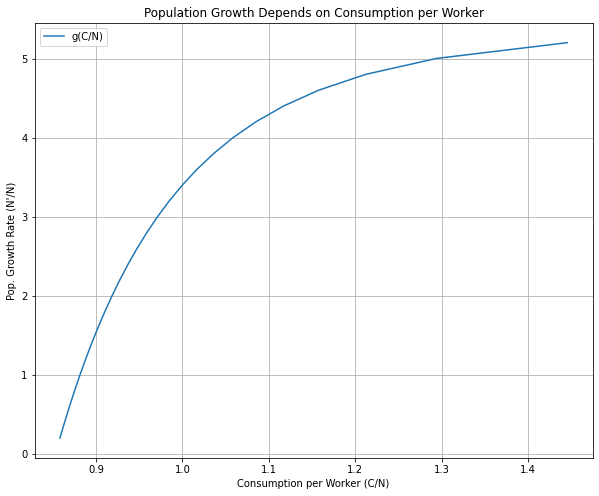

In [14]:
"Define parameters and arrays"
# parameters 
z = 1 # total factor productivity
N = 27 # labour stock
L = 10 # stock of land; which is a fixed value
theta = 0.4 # output elasticity of land/capital
gamma = 0.4
# numpy arrays;
n = np.arange(1,N) # create an array of N; array of Labour
b_r = np.arange(5.2,2.6,-0.1) # birth rate; parameters are defined as start, stop, and step of intervals
d_r = np.arange(1,3.6,0.1) # death rate; parameters are defined as start, stop, and step of intervals
N_f = n+n*(b_r-d_r) # future population

"The Cobb-Douglas Production Function"
def production(z,L): # function for cobb-douglas equation
    Y = z * L**(theta) * n**(1-theta)
    return Y
"Function: N'/N = g(C/N)"
def consumption_worker(Y): # function g(C/N)
    C_N = (Y/n)**gamma
    return C_N
"Population Growth Rate"
def pop_growth(N_f): # population growth rate; equivalent to 1 + growth rate
    N_n = N_f/n
    return N_n
"Calculate values to be plotted"
Y = production(z,L)
cons_worker = consumption_worker(Y)
pop_growth = pop_growth(N_f)
"Plot Population growth vis-a-vis Consumption per capita"
# population growth and cons. per capita;
fig, ax = plt.subplots(figsize=(10,8))
ax.set(title="Population Growth Depends on Consumption per Worker", xlabel="Consumption per Worker (C/N)", ylabel="Pop. Growth Rate (N'/N)")
ax.grid()
ax.plot(cons_worker,pop_growth, label='g(C/N)')
ax.legend()

## The Steady State

A unique steady state arises where:

$$N^{*} = g[zF(\frac{L}{N^{*}}, 1)]N^{*}$$

When $N < N^{*}$, $N' > N$ and the population increases. When $N > N^{*}$, $N' < N$ and the population decreases.

The point where the 45-degree line intersects with $g(zF(\frac{L}{N},1))N$ is the rest point or steady state for the population. This is also defined as the long-run equilibrium. Furthermore, lower case letters indicate per-worker quantities, so $y \equiv \frac{Y}{N}$, $l \equiv \frac{L}{N}$, and $c \equiv \frac{C}{N}$. We then have $y = zf(l)$ which is the per-worker production function. In the steady state, $N' = N = N^{*}$, so $\frac{N'}{N}=1$, this means that $g(c^{*}) = 1$, and that $c^{*} = zf(l^{*})$. Also, since land is fixed, we can determine the steady state population as $N^{*}=\frac{L}{l^{*}}$. 

An essential component of this model is that $c$, which is consumption per-worker is determined solely by $g$. This means that changes in technology (i.e. a positive technology shock) has limited impact on long-run living standards.

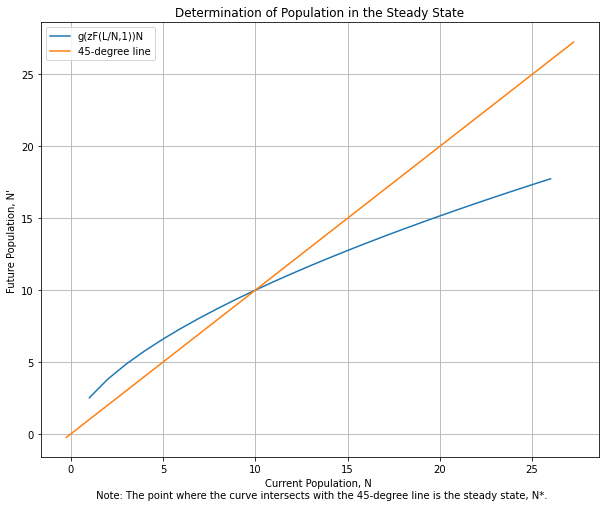

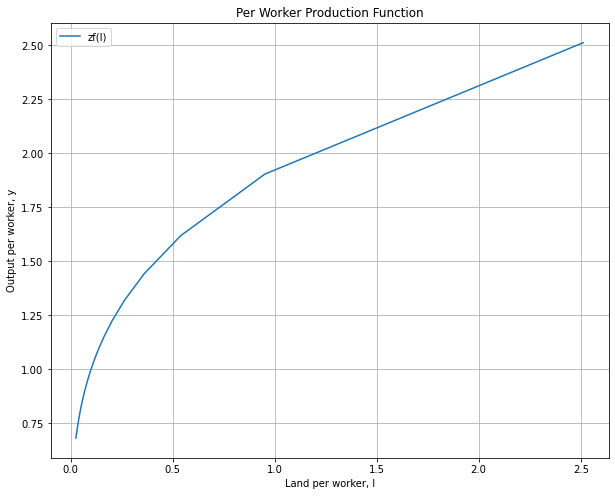

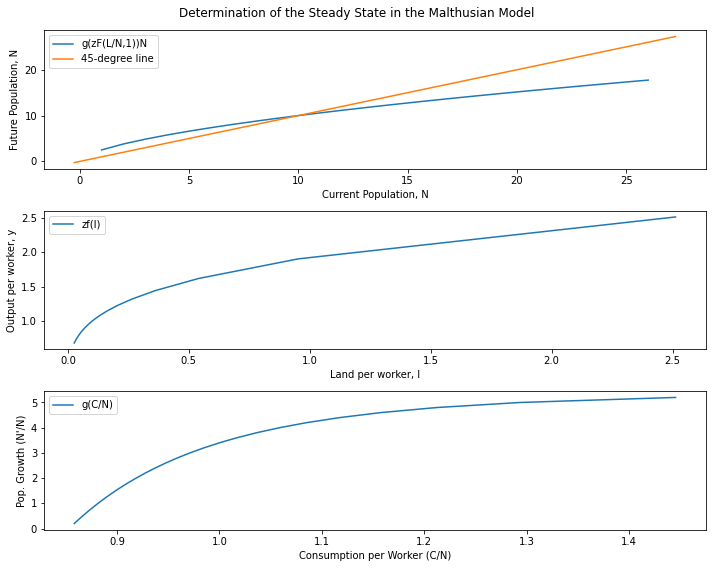

In [15]:
"Deriving N' through application of CRS property"
def future_pop(C_N):
    future_pop = (C_N/n)*n
    return future_pop
# calculate values
future_pop = future_pop(Y)
"Plot the Steady State"
# future population and current population;
fig, ax = plt.subplots(figsize=(10,8))
ax.set(title="Determination of Population in the Steady State", 
       xlabel="Current Population, N \n Note: The point where the curve intersects with the 45-degree line is the steady state, N*.", 
       ylabel="Future Population, N'")
ax.grid()
ax.plot(n,future_pop, label='g(zF(L/N,1))N')
# 45-degree line for steady state
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, label='45-degree line')
ax.legend()

"Steady State Values"
c_star0 = z*n**(theta-1) * (L**(1-theta))/n
n_star0 = L**theta * n

"Calculate Per Worker Production Function"
def production_capita(z,L):
    y = z * L**(theta) / n**(1+theta)
    return y
y = production_capita(z,L)
y_n = Y/n # output per capita
"Plot per worker production function"
# per worker production function;
fig, ax = plt.subplots(figsize=(10,8))
ax.set(title="Per Worker Production Function", xlabel="Land per worker, l", ylabel="Output per worker, y")
ax.grid()
ax.plot(y, y_n, label='zf(l)')
ax.legend()

"Plot"
fig, ax = plt.subplots(3,figsize=(10,8))
fig.suptitle('Determination of the Steady State in the Malthusian Model')
ax[0].set(xlabel="Current Population, N", ylabel="Future Population, N") 
ax[0].plot(n,future_pop,label='g(zF(L/N,1))N')
x = np.linspace(*ax[0].get_xlim())
ax[0].plot(x,x,label='45-degree line')
ax[0].legend()
ax[1].set(xlabel="Land per worker, l", ylabel="Output per worker, y")
ax[1].plot(y, y_n, label='zf(l)')
ax[1].legend()
ax[2].set(xlabel="Consumption per Worker (C/N)", ylabel="Pop. Growth (N'/N)")
ax[2].plot(cons_worker,pop_growth, label='g(C/N)')
ax[2].legend()
plt.tight_layout()